# Usage of VisualVariables and other Renderer options in Map Widget
This guide shows more advanced usage of Renderer options in Map Widget, e.g. Class Breaks in size and colors, and Unique Value Renderers. The purpose is to give users more freedom into customizing their own style or symbolizing. For previous coverage of map widgets, please go to [using the map widget](https://developers.arcgis.com/python/guide/using-the-map-widget) and [Advanced Map Widget Usage](https://developers.arcgis.com/python/guide/advanced-map-widget-useage/)

#### As usual, start by connecting to your GIS:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

## Part 1. Style based on numeric values in your data

Map Viewer gives you control over styling elements such as color ramps, line weights, transparency, and symbols. To begin with, let's experimnt with several styling options are available for visualizing features according to numeric values in your data.

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)


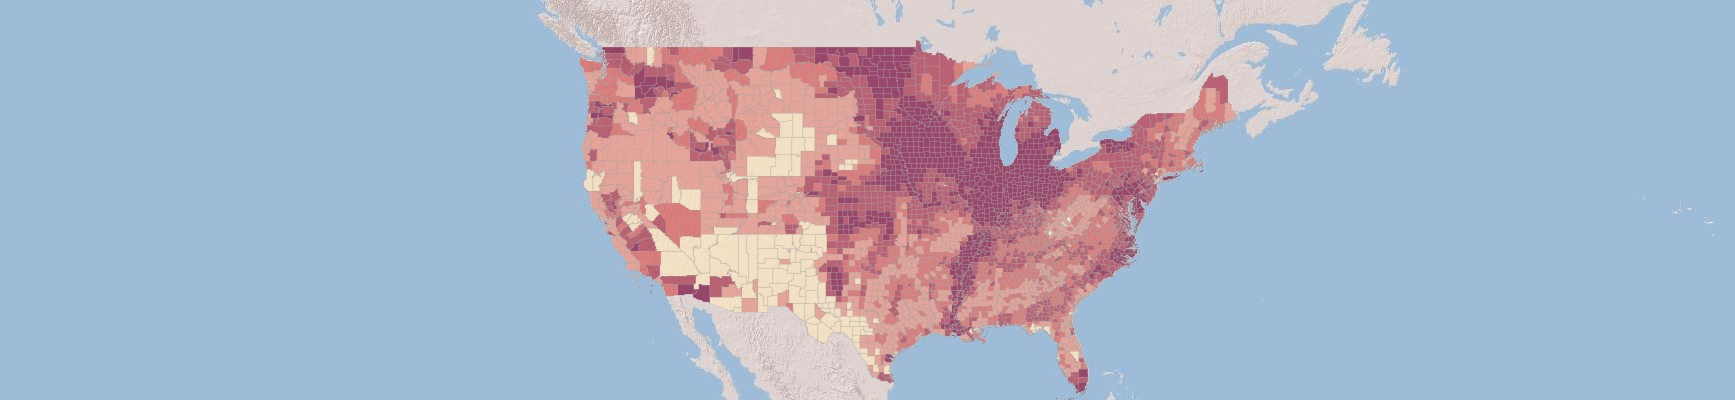

In [2]:
map1 = gis.map("USA", 4)
map1

### Section 1.1 Styled using only one numeric attribute

If you have numeric data, you may want to distinguish features using graduated colors to reflect a count or an amount. Different kinds of color ramps can be used—for example, a simple light-to-dark color ramp is good for showing low-to-high data values such as age, income, or ratio. Color ramps like this can be applied to points, lines, or polygons. For example, you can use a light-to-dark color ramp to represent the ratio of cropland area to general land area from low to high by county. More documentation can be found in [Style numbers](http://doc.arcgis.com/en/arcgis-online/create-maps/style-numbers.htm#ESRI_SECTION1_1D8BD412F83148C6ABF315CA10111E66).

In [3]:
'''
# only 1 numeric attribute
# (a) to visualize with counts and amounts (color)
# field_name here represents "The acres of total cropland as a percentage of land area in acres"
'''
map1.add_layer({ "type": "FeatureLayer",
                 "url": "https://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/USA_County_Crops_2007/FeatureServer/0",
                 "renderer":"ClassedColorRenderer",
                 "field_name":"M086_07",
})

The Python API also supports specifying Javascript renderers via autocasting. By specifying renderer: "autocast" for any renderer, you are directing Python to allow the Javascript API to attempt to infer the renderer by following Javascript API rules. Since Python dict's map directly to JavaScript JSON, you can specify any Javascript Renderer for a large range of visualization options! Look at the example of `map2` below to explore how to provide your own customized class breaks and specific symbols with color, size, labels, etc.

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)


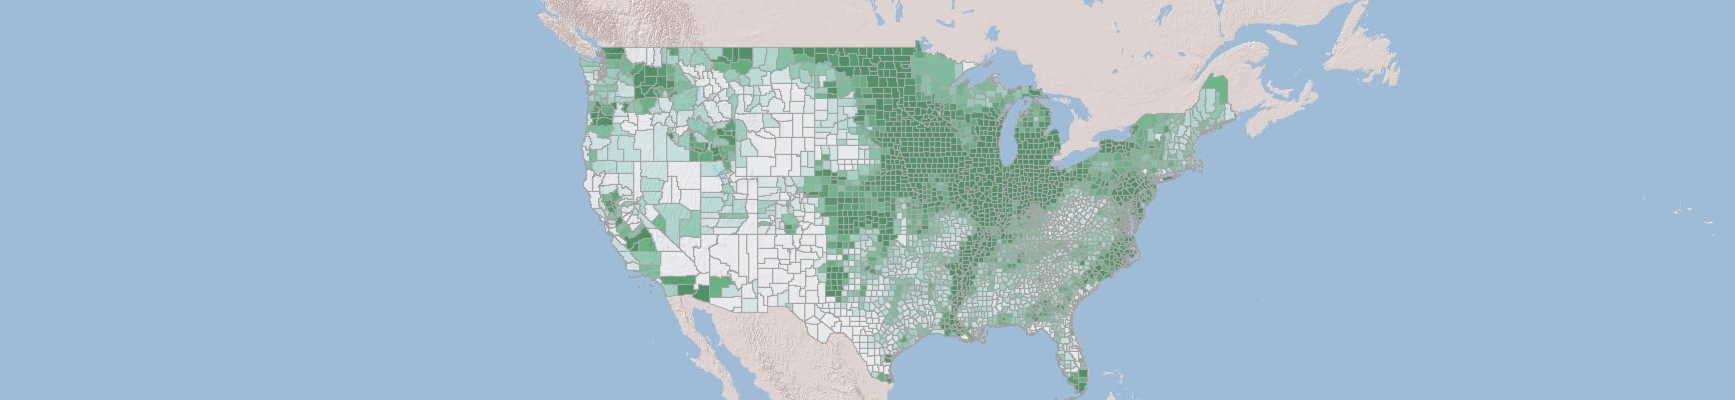

In [4]:
'''
# only 1 numeric attribute
# (a) to visualize with counts and amounts (color) + Customized class breaks
# field_name here represents "The acres of total cropland as a percentage of land area in acres"
'''
map2 = gis.map("USA", 4)

map2_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"M086_07",
                 "minValue":-9007199254740991
}

map2_renderer["visualVariables"] = [{
                                "type": "colorInfo",
                                "field": "M086_07",
                                "stops": [
                                    {
                                        "value": 10,
                                        "color": [
                                            237,
                                            248,
                                            251,
                                            204
                                        ],
                                        "label": "< 10"
                                    },
                                    {
                                        "value": 25,
                                        "color": [
                                            178,
                                            226,
                                            226,
                                            204
                                        ],
                                        "label": "10~39.5"
                                    },
                                    {
                                        "value": 39.5,
                                        "color": [
                                            102,
                                            194,
                                            164,
                                            204
                                        ],
                                        "label": "39.5"
                                    },
                                    {
                                        "value": 54,
                                        "color": [
                                            44,
                                            162,
                                            95,
                                            204
                                        ],
                                        "label": "39.5~68"
                                    },
                                    {
                                        "value": 68,
                                        "color": [
                                            0,
                                            109,
                                            44,
                                            204
                                        ],
                                        "label": "> 68"
                                    }
                                ]
                            }]

map2_renderer["classBreakInfos"] = [{
                                "symbol": {
                                    "color": [
                                        170,
                                        170,
                                        170,
                                        204
                                    ],
                                    "outline": {
                                        "color": [
                                            153,
                                            153,
                                            153,
                                            255
                                        ],
                                        "width": 0.375,
                                        "type": "esriSLS",
                                        "style": "esriSLSSolid"
                                    },
                                    "type": "esriSFS",
                                    "style": "esriSFSSolid"
                                },
                                "classMaxValue": 9007199254740991
                            }]

map2.add_layer({ "type": "FeatureLayer",
                 "url": "https://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/USA_County_Crops_2007/FeatureServer/0",
                 "renderer": map2_renderer,
                 "field_name":"M086_07",
                 "minValue":-9007199254740991,
                 "definitionExpression": "AREA > 0.001"
})

map2

Besides taking advantage of the color differences in visualization to being audience sense of the orderable sequence of your numeric data or ranks, size differences also play an important role in mapping. This map style uses an orderable sequence of different sizes to represent your numeric data or ranked categories. Points, lines, and areas can all be drawn using this approach. Polygon features are displayed as proportional points over polygons. These proportional symbol maps use an intuitive logic that larger symbols equate to larger numbers. Adjust the size of the symbols to clarify the story you’re telling. More documentation can be found in [Counts and Amounts (Size)](http://doc.arcgis.com/en/arcgis-online/create-maps/style-numbers.htm#ESRI_SECTION1_1D8BD412F83148C6ABF315CA10111E66)

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)


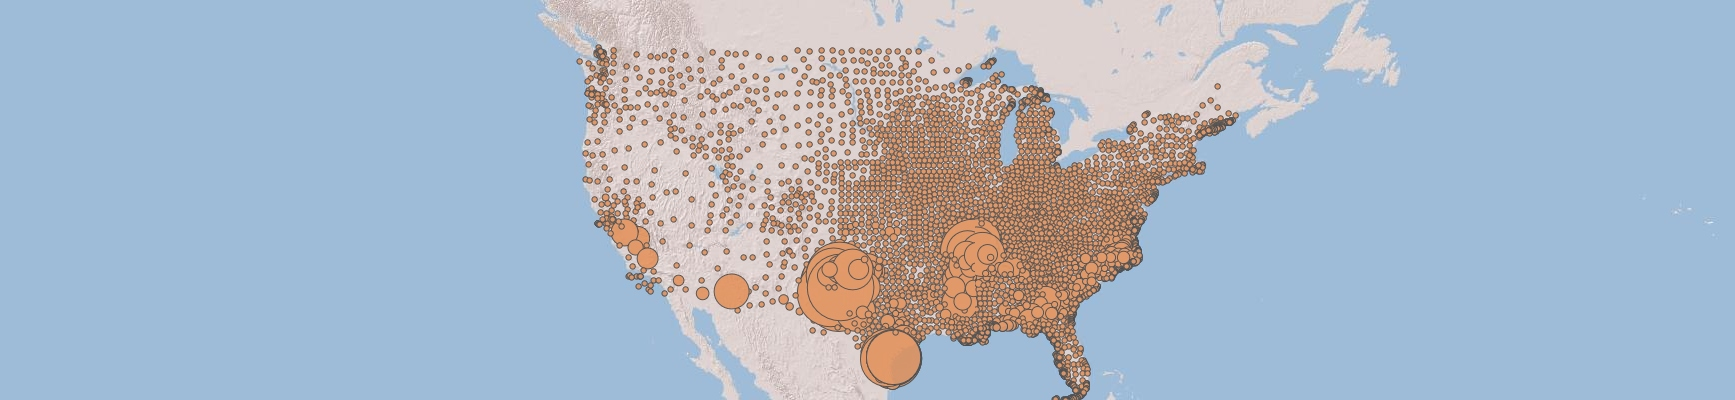

In [5]:
'''
# only 1 numeric attribute
# (b) counts and amounts (size)
# The field used here represent the harvested acres of Upland Cotton
'''
map3 = gis.map("USA", 4)

map3_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"M188_07",
                 "transparency":20,
                 "minValue":-9007199254740991
}

map3_renderer["visualVariables"] = [
        {
            "type": "sizeInfo",
            "field": "M188_07",
            "valueUnit": "unknown",
            "minSize": {
                "type": "sizeInfo",
                "expression": "view.scale",
                "stops": [
                    {
                        "value": 1128,
                        "size": 16
                    },
                    {
                        "value": 144447,
                        "size": 16
                    },
                    {
                        "value": 18489298,
                        "size": 4
                    },
                    {
                        "value": 147914382,
                        "size": 4
                    },
                    {
                        "value": 591657528,
                        "size": 2
                    }
                ]
            },
            "maxSize": {
                "type": "sizeInfo",
                "expression": "view.scale",
                "stops": [
                    {
                        "value": 1128,
                        "size": 80
                    },
                    {
                        "value": 144447,
                        "size": 80
                    },
                    {
                        "value": 18489298,
                        "size": 50
                    },
                    {
                        "value": 147914382,
                        "size": 50
                    },
                    {
                        "value": 591657528,
                        "size": 25
                    }
                ]
            },
            "minDataValue": 0,
            "maxDataValue": 150000
        },
        {
            "type": "sizeInfo",
            "target": "outline",
            "expression": "view.scale",
            "stops": [
                {
                    "size": 2,
                    "value": 1080478
                },
                {
                    "size": 1,
                    "value": 6752990
                },
                {
                    "size": 1,
                    "value": 27011958
                },
                {
                    "size": 0,
                    "value": 54023916
                }
            ]
        }
    ]

map3_renderer["classBreakInfos"] = [
        {
            "symbol": {
                "color": [
                    227,
                    139,
                    79,
                    255
                ],
                "size": 9,
                "angle": 0,
                "xoffset": 0,
                "yoffset": 0,
                "type": "esriSMS",
                "style": "esriSMSCircle",
                "outline": {
                    "color": [
                        51,
                        51,
                        51,
                        255
                    ],
                    "width": 0.75,
                    "type": "esriSLS",
                    "style": "esriSLSSolid"
                }
            },
            "classMaxValue": 9007199254740991
        }
    ]

map3.add_layer({ "type": "FeatureLayer",
                 "url": "https://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/USA_County_Crops_2007/FeatureServer/0",
                 "renderer":map3_renderer,
                 "field_name":"M188_07",
})

map3

### Section 1.2 Compare A to B
This style allows you to map the ratio between two numbers and express that relationship as percentages, simple ratios, or overall percentage. For example, you can map the estimated population for 2025 as a percentage of the known population in 2015 to observe the trend of population shift. Find out more via [Compare A to B](http://doc.arcgis.com/en/arcgis-online/create-maps/style-numbers.htm#ESRI_SECTION1_F269A11801BF4CCDA1E9584B585C4671).

MapView(layout=Layout(height='400px', width='100%'), zoom=2.0)


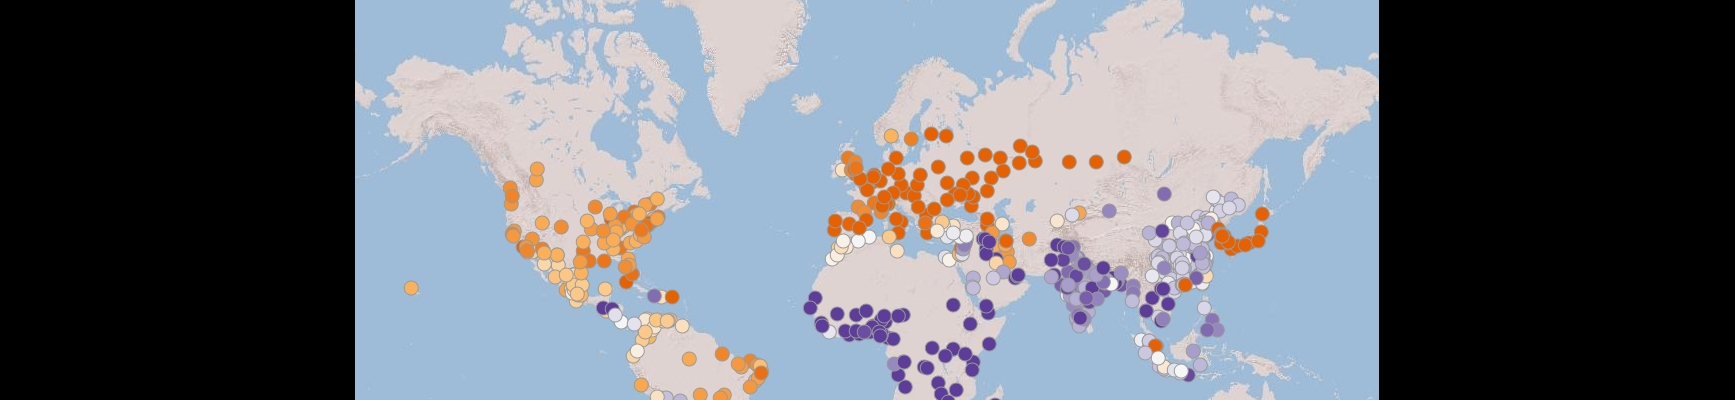

In [6]:
"""
# with 2 numeric attributes
# compare A to B
# The field used here represent percentage of [population of projected 2025] as pf [population of 2015]
"""
map4 = gis.map("France", 2)

map4_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"POP2025",
                 "transparency":80,
                 "minValue":-9007199254740991
}

map4_renderer["visualVariables"] = [
                            {
                                "type": "colorInfo",
                                "field": "POP2025",
                                "normalizationField": "POP2015",
                                "stops": [
                                    {
                                        "value": 1.12,
                                        "color": [
                                            230,
                                            97,
                                            1,
                                            255
                                        ],
                                        "label": "< 112%"
                                    },
                                    {
                                        "value": 1.1800000000000002,
                                        "color": [
                                            253,
                                            184,
                                            99,
                                            255
                                        ],
                                        "label": "112% ~ 124%"
                                    },
                                    {
                                        "value": 1.24,
                                        "color": [
                                            247,
                                            247,
                                            247,
                                            255
                                        ],
                                        "label": "124%"
                                    },
                                    {
                                        "value": 1.3,
                                        "color": [
                                            178,
                                            171,
                                            210,
                                            255
                                        ],
                                        "label": "124% ~ 136%"
                                    },
                                    {
                                        "value": 1.36,
                                        "color": [
                                            94,
                                            60,
                                            153,
                                            255
                                        ],
                                        "label": "> 136%"
                                    }
                                ]
                            }
                        ]

map4_renderer["classBreakInfos"] = [
                            {
                                "symbol": {
                                    "color": [
                                        170,
                                        170,
                                        170,
                                        255
                                    ],
                                    "size": 10.5,
                                    "angle": 0,
                                    "xoffset": 0,
                                    "yoffset": 0,
                                    "type": "esriSMS",
                                    "style": "esriSMSCircle",
                                    "outline": {
                                        "color": [
                                            153,
                                            153,
                                            153,
                                            255
                                        ],
                                        "width": 0.375,
                                        "type": "esriSLS",
                                        "style": "esriSLSSolid"
                                    }
                                },
                                "classMaxValue": 9007199254740991
                            }
                        ]

map4.add_layer({ "type": "FeatureLayer",
                 "url": "http://services.arcgis.com/nGt4QxSblgDfeJn9/arcgis/rest/services/World_LargestUrbanAreas_fs/FeatureServer/0",
                 "renderer": map4_renderer,
                 "field_name":"POP2025",
                 "normalizationType": "esriNormalizeByField",
                 "normalizationField": "POP2015"
})

map4

### Section 1.3 Predominant category and size
Use this map style to compare multiple related attributes with the same unit of measure. Like the Predominant Category style, this style uses color to visualize the predominant attribute and transparency in order to show the degree of its predominance compared to the other attributes. In addition, the Predominant Category and Size style uses a third element—size—to represent the sum of the attributes for each feature. For example, in a layer that shows crop production by United States county, you can apply this style to see which crop—wheat, corn, soybeans, and so on—has the highest value in each county, and how much higher the predominant crop's value is compared to the other crops. In addition, by applying proportional symbols to the layer, you can compare total crop production across counties, visualizing which counties have high total crop production and which have a lower yield. Find out more about this style at [Predominant Category](http://doc.arcgis.com/en/arcgis-online/create-maps/style-numbers.htm#ESRI_SECTION1_C188623AB09249C8AB88621A99307E23).

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)


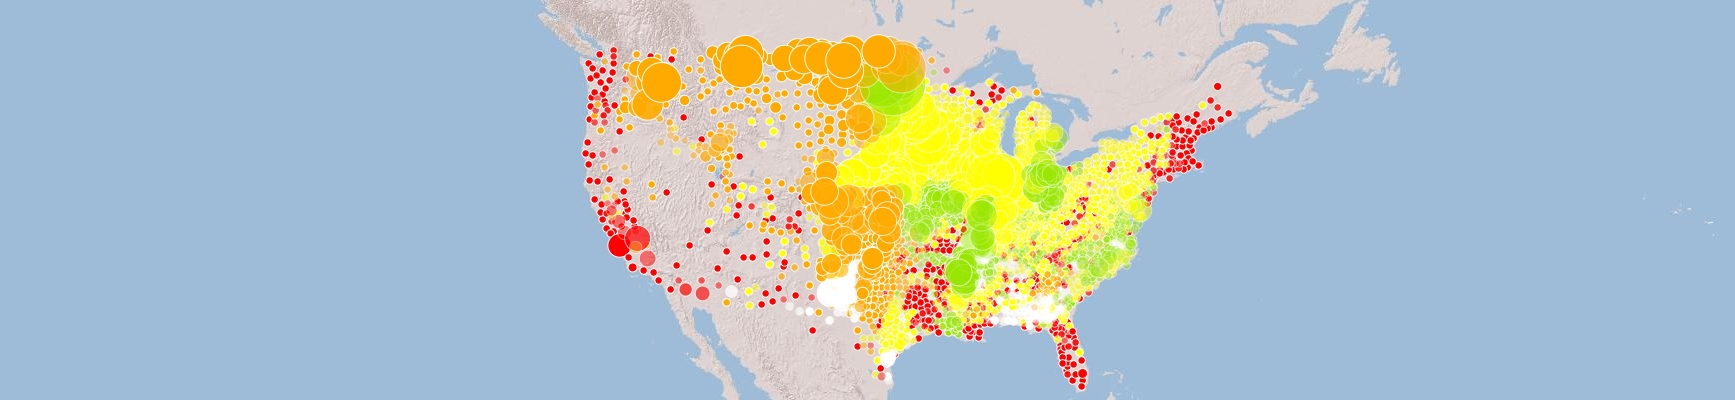

In [7]:
"""
# with 2 to 10 related numeric attributes with the same unit of measurement
# Predominant category and size
# The field used here represent the predominant crop production
"""
map5 = gis.map("USA", 4)

map5_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "uniqueValue"
                }

map5_renderer["valueExpression"] = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                                    var numFields = 5;\
                                    var maxValueField = null;\
                                    var maxValue = -Infinity;\
                                    var value, i, totalValue = null;\
                                    for(i = 0; i < numFields; i++) {\
                                        value = $feature[fieldNames[i]];\
                                        if(value > 0) {\
                                            if(value > maxValue) {\
                                                maxValue = value;\
                                                maxValueField = fieldNames[i];\
                                            }\
                                            else if (value == maxValue) {\
                                                maxValueField = null;\
                                            }\
                                        }\
                                    }\
                                    return maxValueField;"

transparencyInfo_valueExpression = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                                    var numFields = 5;\
                                    var maxValueField = null;\
                                    var maxValue = -Infinity;\
                                    var value, i, totalValue = null;\
                                    for(i = 0; i < numFields; i++) {\
                                        value = $feature[fieldNames[i]];\
                                        if(value > 0) {\
                                            if(value > maxValue) {\
                                                maxValue = value;\
                                                maxValueField = fieldNames[i];\
                                            }\
                                            else if (value == maxValue) {\
                                                maxValueField = null;\
                                            }\
                                        }\
                                        if(value != null && value >= 0) {\
                                            if (totalValue == null) { totalValue = 0; }\
                                            totalValue = totalValue + value;\
                                        }\
                                    }\
                                    var strength = null;\
                                    if (maxValueField != null && totalValue > 0) {\
                                        strength = (maxValue / totalValue) * 100;\
                                    }\
                                    return strength;"

sizeInfo_valueExpression = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                            var numFields = 5;\
                            var value, i, totalValue = null;\
                            for(i = 0; i < numFields; i++) {\
                                value = $feature[fieldNames[i]];\
                                if(value != null && value >= 0) {\
                                    if (totalValue == null) { totalValue = 0; }\
                                    totalValue = totalValue + value;\
                                }\
                            }\
                            return totalValue;"

map5_renderer["visualVariables"] = [
                            {
                                "type": "transparencyInfo",
                                "valueExpression": transparencyInfo_valueExpression,
                                "stops": [
                                    {
                                        "value": 20,
                                        "transparency": 85
                                    },
                                    {
                                        "value": 95,
                                        "transparency": 0
                                    }
                                ],
                                "legendOptions": {
                                    "title": "Strength of predominance"
                                }
                            },
                            {
                                "type": "sizeInfo",
                                "valueExpression": sizeInfo_valueExpression,
                                "valueUnit": "unknown",
                                "minSize": {
                                    "type": "sizeInfo",
                                    "expression": "view.scale",
                                    "stops": [
                                        {
                                            "value": 1128,
                                            "size": 16
                                        },
                                        {
                                            "value": 72223,
                                            "size": 16
                                        },
                                        {
                                            "value": 9244649,
                                            "size": 6
                                        },
                                        {
                                            "value": 147914382,
                                            "size": 4
                                        },
                                        {
                                            "value": 591657528,
                                            "size": 2
                                        }
                                    ]
                                },
                                "maxSize": {
                                    "type": "sizeInfo",
                                    "expression": "view.scale",
                                    "stops": [
                                        {
                                            "value": 1128,
                                            "size": 80
                                        },
                                        {
                                            "value": 72223,
                                            "size": 80
                                        },
                                        {
                                            "value": 9244649,
                                            "size": 50
                                        },
                                        {
                                            "value": 147914382,
                                            "size": 50
                                        },
                                        {
                                            "value": 591657528,
                                            "size": 25
                                        }
                                    ]
                                },
                                "minDataValue": 50000,
                                "maxDataValue": 800000,
                                "legendOptions": {
                                    "title": "Sum of categories"
                                }
                            }
                        ]

map5_renderer["uniqueValueInfos"] = [
                            {
                                "value": "M163_07",
                                "symbol": {
                                    "color": [
                                        255,
                                        255,
                                        0,
                                        255
                                    ],
                                    "size": 6,
                                    "angle": 0,
                                    "xoffset": 0,
                                    "yoffset": 0,
                                    "type": "esriSMS",
                                    "style": "esriSMSCircle",
                                    "outline": {
                                        "color": "White",
                                        "width": 0.75,
                                        "type": "esriSLS",
                                        "style": "esriSLSNull"
                                    }
                                },
                                "label": "Corn for grain, harvested acres."
                            },
                            {
                                "value": "M172_07",
                                "symbol": {
                                    "color": [
                                        255,
                                        170,
                                        0,
                                        255
                                    ],
                                    "size": 6,
                                    "angle": 0,
                                    "xoffset": 0,
                                    "yoffset": 0,
                                    "type": "esriSMS",
                                    "style": "esriSMSCircle",
                                    "outline": {
                                        "color": "White",
                                        "width": 0.75,
                                        "type": "esriSLS",
                                        "style": "esriSLSNull"
                                    }
                                },
                                "label": "All wheat for grain, harvested acres."
                            },
                            {
                                "value": "M193_07",
                                "symbol": {
                                    "color": [
                                        152,
                                        230,
                                        0,
                                        255
                                    ],
                                    "size": 6,
                                    "angle": 0,
                                    "xoffset": 0,
                                    "yoffset": 0,
                                    "type": "esriSMS",
                                    "style": "esriSMSCircle",
                                    "outline": {
                                        "color": "White",
                                        "width": 0.75,
                                        "type": "esriSLS",
                                        "style": "esriSLSNull"
                                    }
                                },
                                "label": "Soybeans for beans, harvested acres."
                            },
                            {
                                "value": "M188_07",
                                "symbol": {
                                    "color": [
                                        255,
                                        255,
                                        255,
                                        255
                                    ],
                                    "size": 6,
                                    "angle": 0,
                                    "xoffset": 0,
                                    "yoffset": 0,
                                    "type": "esriSMS",
                                    "style": "esriSMSCircle",
                                    "outline": {
                                        "color": "White",
                                        "width": 0.75,
                                        "type": "esriSLS",
                                        "style": "esriSLSNull"
                                    }
                                },
                                "label": "Upland cotton, harvested acres."
                            },
                            {
                                "value": "M217_07",
                                "symbol": {
                                    "color": [
                                        255,
                                        0,
                                        0,
                                        255
                                    ],
                                    "size": 6,
                                    "angle": 0,
                                    "xoffset": 0,
                                    "yoffset": 0,
                                    "type": "esriSMS",
                                    "style": "esriSMSCircle",
                                    "outline": {
                                        "color": "White",
                                        "width": 0.75,
                                        "type": "esriSLS",
                                        "style": "esriSLSNull"
                                    }
                                },
                                "label": "Vegetables, acres harvested for sale."
                            }
                        ]


map5.add_layer({ "type": "FeatureLayer",
                 "url": "http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/US_county_crops_2007_clean/FeatureServer/0",
                 "renderer": map5_renderer
})

map5

## Part 2. Style based on categorical data

Map Viewer allows you to explore your data in different ways through a variety of smart mapping styles. When you use Change Style in Map Viewer, the nature of your data determines the styling suggestions you see by default. Once you have decided how you want to present your layer, you can make changes to its appearance that are immediately reflected on the map. Map Viewer gives you control over styling elements such as color ramps, line weights, transparency, and symbols.

### Section 2.1 Types (Unique symbols)

Use unique symbols to show different types of things (categorical data), not counts or numeric measurements. For example, you can use different colors to represent different rail lines in the city. More documentation please refer to [Types (Unique symbols)](http://doc.arcgis.com/en/arcgis-online/create-maps/style-categories.htm#ESRI_SECTION1_1084DA17FD3C470B87A004AB55132D38)

MapView(layout=Layout(height='400px', width='100%'), zoom=11.0)


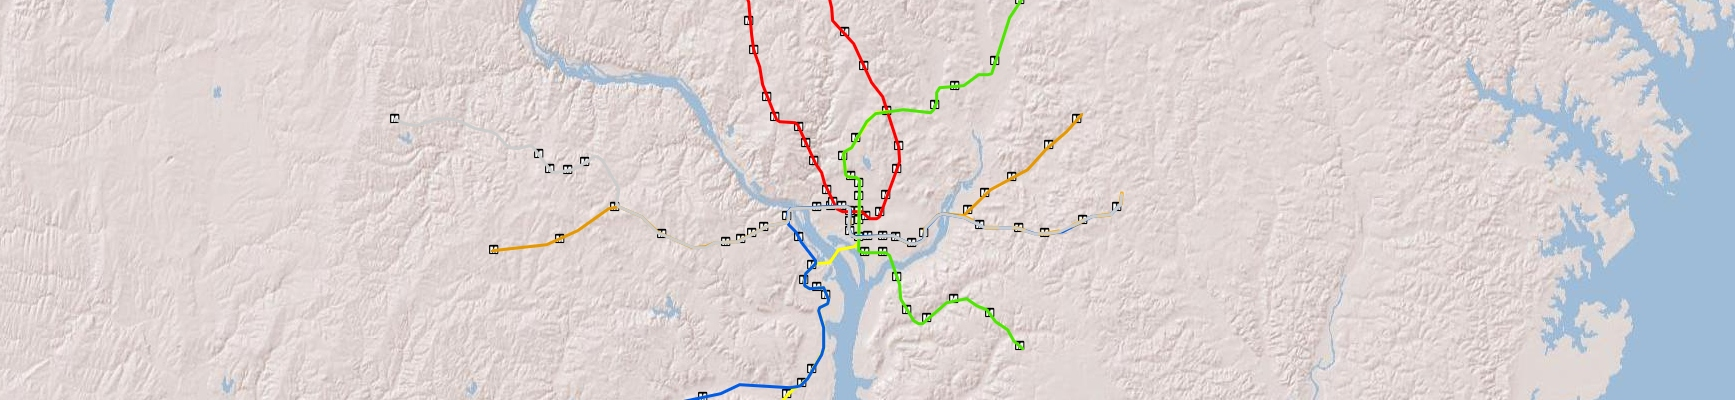

In [8]:
'''
# with category
# Unique symbols
# The field used here represent different rail lines in the city.
'''
map6 = gis.map("D. C., USA", 11)

map6_layers = [
                {
                    "id": 51,
                    "popupInfo": {
                        "title": "Metro Station",
                        "fieldInfos": [
                            {
                                "fieldName": "OBJECTID",
                                "label": "OBJECTID",
                                "tooltip": "",
                                "visible": False,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "GIS_ID",
                                "label": "GIS_ID",
                                "tooltip": "",
                                "visible": True,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "NAME",
                                "label": "NAME",
                                "tooltip": "",
                                "visible": True,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "WEB_URL",
                                "label": "WEB_URL",
                                "tooltip": "",
                                "visible": True,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "ADDRESS",
                                "label": "ADDRESS",
                                "tooltip": "",
                                "visible": True,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "LINE",
                                "label": "LINE",
                                "tooltip": "",
                                "visible": True,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "Shape",
                                "label": "Shape",
                                "tooltip": "",
                                "visible": False,
                                "stringFieldOption": "textbox"
                            }
                        ],
                        "description": "<font face='Tahoma' size='3'>{name}<br /><br />Line: {line} <\/font>",
                        "showAttachments": True,
                        "mediaInfos": []
                    }
                },
                {
                    "id": 58,
                    "popupInfo": {
                        "title": "Metro Line",
                        "fieldInfos": [
                            {
                                "fieldName": "OBJECTID",
                                "label": "OBJECTID",
                                "tooltip": "",
                                "visible": False,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "GIS_ID",
                                "label": "GIS_ID",
                                "tooltip": "",
                                "visible": True,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "NAME",
                                "label": "NAME",
                                "tooltip": "",
                                "visible": True,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "WEB_URL",
                                "label": "WEB_URL",
                                "tooltip": "",
                                "visible": True,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "Shape",
                                "label": "Shape",
                                "tooltip": "",
                                "visible": False,
                                "stringFieldOption": "textbox"
                            },
                            {
                                "fieldName": "Shape_Length",
                                "label": "Shape_Length",
                                "tooltip": "",
                                "visible": False,
                                "format": {
                                    "places": 2,
                                    "digitSeparator": True
                                },
                                "stringFieldOption": "textbox"
                            }
                        ],
                        "description": "<font size='3'>{name}<\/font>",
                        "showAttachments": True,
                        "mediaInfos": []
                    }
                }
            ]

for map_layer in map6_layers:
    map_url = "http://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/" + str(map_layer["id"])
    map6.add_layer({ "type": "FeatureLayer",
                     "url": map_url,
    })

map6

### Section 2.2 Styled with 1 category/type and 1 numeric attribute
This style (types and sizes) allows you to represent your data using different sizes and different categories by color. Choose a text, date, or numeric field for unique values, and a numeric field for size values, and adjust each attribute's map symbol settings as needed. For example, use this style when you want to show a count attribute such as the number of people who have a graduate degree, and use a unique color for each value found in another field such as a county name.

MapView(layout=Layout(height='400px', width='100%'), zoom=11.0)


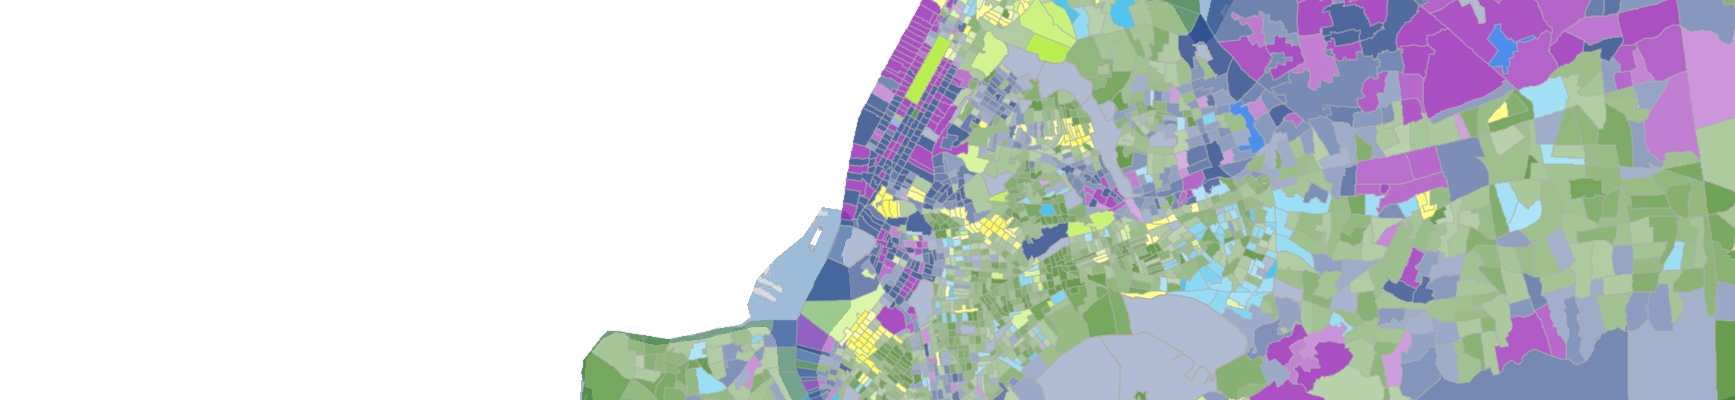

In [22]:
'''
# with category and 1 numeric attribute
# types and sizes
# The field used here represent a count attribute such as the number of people who have a graduate degree, and use a unique color for each value found in another field such as a county name.
'''
map7 = gis.map("New York City, USA", 11)

map7_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "simple"
}

map7_renderer["symbol"] = {
                                "color": "None",
                                "outline": {
                                    "color": "None",
                                    "width": 0.75,
                                    "type": "esriSLS",
                                    "style": "esriSLSNull"
                                },
                                "type": "esriSFS",
                                "style": "esriSFSSolid"
                            }

map7.add_layer({ "type": "FeatureLayer",
                 "url": "http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/Census_Counties_20m/FeatureServer/0",
                 "renderer": map7_renderer
                })

map7.add_layer({ "type": "FeatureLayer",
                 "url": "http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/NY Educational Attainment/FeatureServer/0",
                 "transparency": 75
                })

map7

## Part 3. Styled with date/time attribute(s)

Map Viewer allows you to explore your data in different ways through a variety of smart mapping styles. When you use Change Style in Map Viewer, the nature of your data determines the styling suggestions you see by default. Once you have decided how you want to present your layer, you can make changes to its appearance that are immediately reflected on the map. Map Viewer gives you control over styling elements such as color ramps, line weights, transparency, and symbols. Find out more about this in [Styled with date/time attribute(s)](http://doc.arcgis.com/en/arcgis-online/create-maps/style-time.htm#ESRI_SECTION1_221C06A43F2D4375BCF519EB4D80877D)

### Section 3.1 Styled with 1 date/time attribute

One of the styles is to show the age of attributes (length of time) in colors. If your layer contains date or time values, you may want to use color to represent the age of features. Age reflects the length of time (in seconds, minutes, hours, days, months, or years) from a start date or time to an end date or time. For example, by applying this style to a parcels layer using the sale date attribute and the current date to specify the period of time, you can use color to show which homes in a neighborhood were sold more than 15 years ago and which were sold more recently. Check out more in [Styled with 1 date/time attribute](http://doc.arcgis.com/en/arcgis-online/create-maps/style-time.htm#ESRI_SECTION1_221C06A43F2D4375BCF519EB4D80877D)

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)


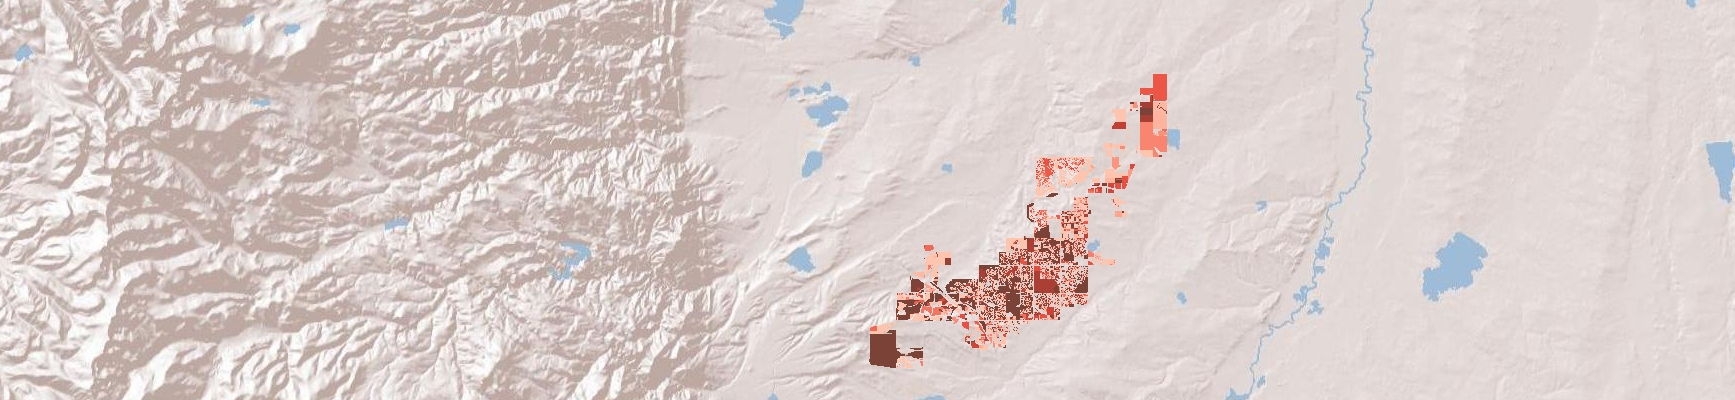

In [10]:
"""
# 1 date/time attribute
# (a) Age (Color)
# The field used here represent which homes in a neighborhood were sold more than 15 years ago and which were sold more recently
"""
mapA = gis.map("Boulder, CO, USA", 10)

mapA_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "minValue":-9007199254740991
}

mapA_valueExpression = "var startTime = $feature.SALEDATE;\
                        var endTime = 1464917820000;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                            startTime = Date(startTime);\
                            endTime = Date(endTime);\
                            retVal = DateDiff(endTime, startTime, 'years');\
                        }\
                        return retVal;"

mapA_renderer["valueExpression"] = mapA_valueExpression

mapA_renderer["visualVariables"] = [
                                        {
                                            "type": "colorInfo",
                                            "valueExpression": mapA_valueExpression,
                                            "stops": [
                                                {
                                                    "value": 1,
                                                    "color": [
                                                        255,
                                                        196,
                                                        174,
                                                        255
                                                    ],
                                                    "label": "< 1"
                                                },
                                                {
                                                    "value": 4.5,
                                                    "color": [
                                                        249,
                                                        129,
                                                        108,
                                                        255
                                                    ],
                                                    "label": "1 <= value < 4.5"
                                                },
                                                {
                                                    "value": 8,
                                                    "color": [
                                                        236,
                                                        82,
                                                        68,
                                                        255
                                                    ],
                                                    "label": "4.5 <= value < 11.5"
                                                },
                                                {
                                                    "value": 11.5,
                                                    "color": [
                                                        194,
                                                        61,
                                                        51,
                                                        255
                                                    ],
                                                    "label": "11.5 <= value < 15"
                                                },
                                                {
                                                    "value": 15,
                                                    "color": [
                                                        123,
                                                        66,
                                                        56,
                                                        255
                                                    ],
                                                    "label": "> 15"
                                                }
                                            ],
                                            "legendOptions": {
                                                "title": "Age, in years, from Sale Date to 6/2/2016"
                                            }
                                        },
                                        {
                                            "type": "sizeInfo",
                                            "target": "outline",
                                            "expression": "view.scale",
                                            "stops": [
                                                {
                                                    "size": 1.5,
                                                    "value": 713
                                                },
                                                {
                                                    "size": 0.75,
                                                    "value": 2228
                                                },
                                                {
                                                    "size": 0.375,
                                                    "value": 8911
                                                },
                                                {
                                                    "size": 0,
                                                    "value": 17822
                                                }
                                            ]
                                        }
                                    ]

mapA_renderer["classBreakInfos"] = [
                                        {
                                            "symbol": {
                                                "color": [
                                                    170,
                                                    170,
                                                    170,
                                                    255
                                                ],
                                                "outline": {
                                                    "color": [
                                                        128,
                                                        128,
                                                        128,
                                                        128
                                                    ],
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSSolid"
                                                },
                                                "type": "esriSFS",
                                                "style": "esriSFSSolid"
                                            },
                                            "classMaxValue": 9007199254740991
                                        }
                                    ]

mapA.add_layer({ "type": "FeatureLayer",
                 "url": "https://services1.arcgis.com/vXSRPZbyyOmH9pek/arcgis/rest/services/Parcels/FeatureServer/0",
                 "renderer": mapA_renderer,
})

mapA

### Section 3.2 Styled with 1 date/time attribute and 1 numeric attribute
You can use these styles (e.g. Color (Age) and Size and Color and Size (Age)) to show two attributes on your map using color and proportional symbols to see the age of features in your data. Age reflects the length of time (in seconds, minutes, hours, days, months, or years) from a start date or time to an end date or time. The Color (Age) and Size or Color and Size (Age) style can be used when you choose one date attribute and one numeric attribute, or two date attributes. For example, in a map showing approximate locations where migrants went missing, you can use color to show when migrants went missing based on the date the incident was reported, and use proportional symbols to show how many migrants were found dead. Find more details about these styles at [Styled with 1 date/time attribute and 1 numeric attribute](http://doc.arcgis.com/en/arcgis-online/create-maps/style-time.htm#ESRI_SECTION1_4E026F582F9647929A12FA06EB956F72)

MapView(layout=Layout(height='400px', width='100%'), zoom=6.0)


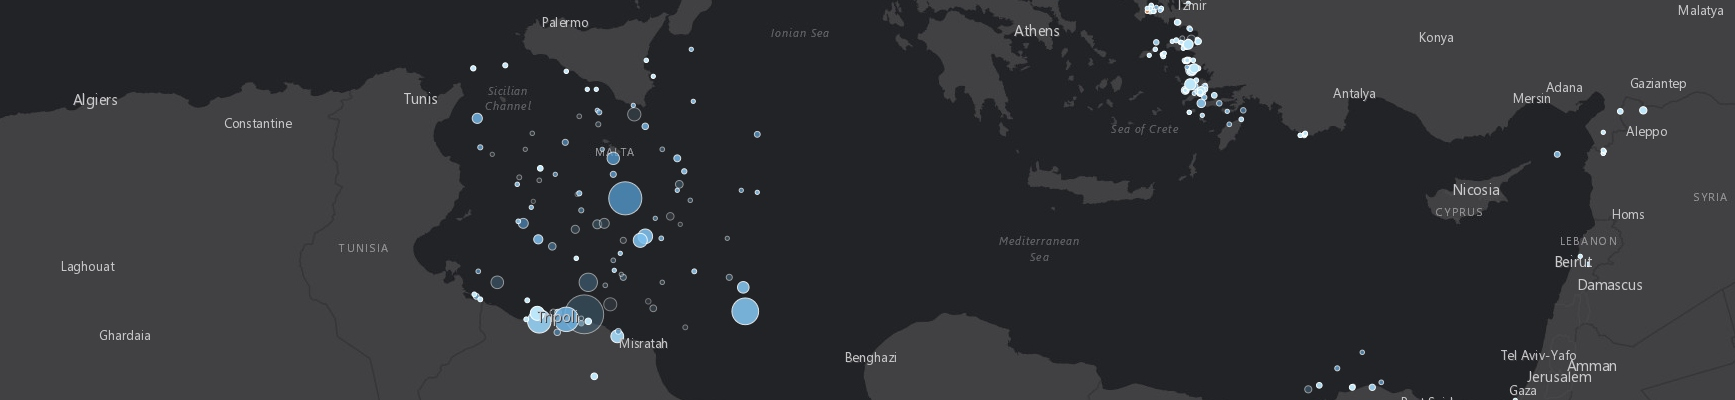

In [11]:
'''
# 1 date/time attribute and and 1 numeric attribute
# (b) Color (Age) and Size
# The field used here represent when migrants went missing based on the date the incident was reported, and use proportional symbols to show how many migrants were found dead
'''
mapB = gis.map("Mediterranean Sea", 6)
mapB.basemap = mapB.basemaps[0]

mapB_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",
                 "field": "DEAD",  
                 "minValue":-9007199254740991
}

mapB_valueExpression = "var startTime = $feature.DATEREPORTED;\
                        var endTime = 1466053210029;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                            startTime = Date(startTime);\
                            endTime = Date(endTime);\
                            retVal = DateDiff(endTime, startTime, 'months');\
                        }\
                        return retVal;"

mapB_renderer["visualVariables"] = [
                                        {
                                            "type": "colorInfo",
                                            "valueExpression": mapB_valueExpression,
                                            "stops": [
                                                {
                                                    "value": 6,
                                                    "color": [
                                                        188,
                                                        230,
                                                        249,
                                                        255
                                                    ],
                                                    "label": "< 6"
                                                },
                                                {
                                                    "value": 10.5,
                                                    "color": [
                                                        116,
                                                        187,
                                                        237,
                                                        255
                                                    ],
                                                    "label": "6 ~ 10.5"
                                                },
                                                {
                                                    "value": 15,
                                                    "color": [
                                                        77,
                                                        150,
                                                        206,
                                                        255
                                                    ],
                                                    "label": "10.5 ~ 19.5"
                                                },
                                                {
                                                    "value": 19.5,
                                                    "color": [
                                                        72,
                                                        121,
                                                        157,
                                                        255
                                                    ],
                                                    "label": "19.5 ~ 24"
                                                },
                                                {
                                                    "value": 24,
                                                    "color": [
                                                        64,
                                                        77,
                                                        84,
                                                        255
                                                    ],
                                                    "label": "> 24"
                                                }
                                            ],
                                            "legendOptions": {
                                                "title": "Age, in months, from DATEREPORTED to 6/15/2016"
                                            }
                                        },
                                        {
                                            "type": "transparencyInfo",
                                            "field": "DATEREPORTED",
                                            "stops": [
                                                {
                                                    "value": 1388563200000,
                                                    "transparency": 70
                                                },
                                                {
                                                    "value": 1451635200000,
                                                    "transparency": 0
                                                }
                                            ]
                                        },
                                        {
                                            "type": "sizeInfo",
                                            "field": "DEAD",
                                            "valueUnit": "unknown",
                                            "minSize": 3,
                                            "maxSize": 33.75,
                                            "minDataValue": 0,
                                            "maxDataValue": 200
                                        }
                                    ]

mapB_renderer["classBreakInfos"] = [
                                        {
                                            "symbol": {
                                                "color": [
                                                    227,
                                                    139,
                                                    79,
                                                    255
                                                ],
                                                "size": 9,
                                                "angle": 0,
                                                "xoffset": 0,
                                                "yoffset": 0,
                                                "type": "esriSMS",
                                                "style": "esriSMSCircle",
                                                "outline": {
                                                    "color": "White",
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSNull"
                                                }
                                            },
                                            "classMaxValue": 9007199254740991
                                        }
                                    ]

mapB.add_layer({ "type": "FeatureLayer",
                 "url": "https://services1.arcgis.com/4yjifSiIG17X0gW4/arcgis/rest/services/Missing Migrants - Incident Reports/FeatureServer/0",
                 "renderer": mapB_renderer,
})

mapB

### Section 3.3 Styled with 1 date/time attribute and 1 category/type attribute

If your layer contains unique values (types) and date or time values, you can use color to show different categories, or types, of features based on the unique values, and proportional symbols to show the age of features. Age reflects the length of time (in seconds, minutes, hours, days, months, or years) from a start date or time to an end date or time. For example, in a map comparing Visa and Amex credit card payments, you can use a different color to represent each credit card company and different-sized symbols to show the length of time since payment.

MapView(layout=Layout(height='400px', width='100%'), zoom=12.0)


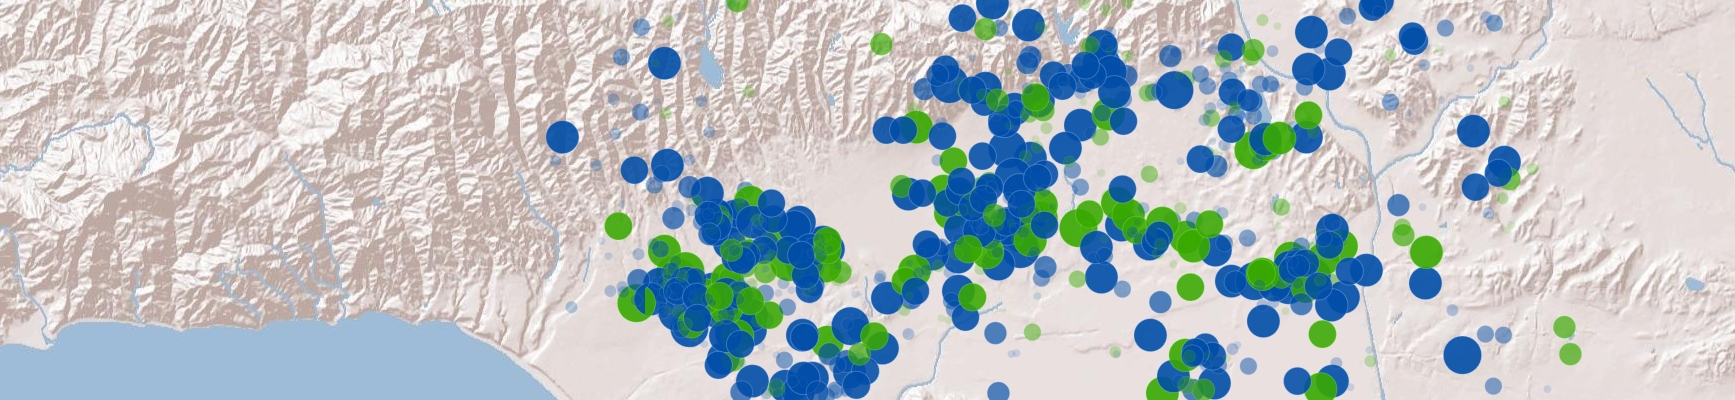

In [15]:
"""
# 1 date/time attribute and 1 category/type attribute
# (c) Types and Size (Age)
# The field used here represent if using Visa or American express for payment method
"""
mapC = gis.map("Beverley Hills, CA, USA", 12)

mapC_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "uniqueValue",  
                 "field1":"PAYMENT",
                 "transparency":20,
                 "minValue":-9007199254740991
}

mapC_valueExpression = "var startTime = $feature.Date;\
                        var endTime = 1466106730360;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                          startTime = Date(startTime);\
                          endTime = Date(endTime);\
                          retVal = DateDiff(endTime, startTime, 'years');\
                        }\
                        return retVal;"

mapC_renderer["visualVariables"] = [
                            {
                                "type": "transparencyInfo",
                                "field": "Date",
                                "stops": [
                                    {
                                        "value": 1383597165692,
                                        "transparency": 9.999999999999998
                                    },
                                    {
                                        "value": 1383917219586,
                                        "transparency": 85
                                    }
                                ]
                            },
                            {
                                "type": "sizeInfo",
                                "valueExpression": mapC_valueExpression,
                                "valueUnit": "unknown",
                                "legendOptions": {
                                    "title": "Age, in years, from Date to 6/16/2016"
                                },
                                "minSize": 6,
                                "maxSize": 30,
                                "minDataValue": 2.605007927448,
                                "maxDataValue": 2.62144628361238
                            }
                        ]

mapC_renderer["uniqueValueInfos"] = [
                            {
                                "value": "VI",
                                "symbol": {
                                    "color": [
                                        0,
                                        77,
                                        168,
                                        255
                                    ],
                                    "size": 6,
                                    "angle": 0,
                                    "xoffset": 0,
                                    "yoffset": 0,
                                    "type": "esriSMS",
                                    "style": "esriSMSCircle",
                                    "outline": {
                                        "color": [
                                            190,
                                            210,
                                            255,
                                            88
                                        ],
                                        "width": 0.75,
                                        "type": "esriSLS",
                                        "style": "esriSLSSolid"
                                    }
                                },
                                "label": "Visa"
                            },
                            {
                                "value": "AX",
                                "symbol": {
                                    "color": [
                                        56,
                                        168,
                                        0,
                                        255
                                    ],
                                    "size": 6,
                                    "angle": 0,
                                    "xoffset": 0,
                                    "yoffset": 0,
                                    "type": "esriSMS",
                                    "style": "esriSMSCircle",
                                    "outline": {
                                        "color": [
                                            163,
                                            255,
                                            115,
                                            82
                                        ],
                                        "width": 0.75,
                                        "type": "esriSLS",
                                        "style": "esriSLSSolid"
                                    }
                                },
                                "label": "Amex"
                            }
                        ]

mapC.add_layer({ "type": "FeatureLayer",
                 "url": "http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/Visa versus Amex/FeatureServer/0",
                 "renderer": mapC_renderer,
                 "field_name":"PAYMENT"
})

mapC

## Conclusion
When you style a layer, the styling options offered depend on the type of features you are mapping (point, line, or polygon) as well as the type of data attributes (numbers, categories, dates, and so on) and number of attributes you choose. Each style helps you tell a slightly different story and answer different questions with your data. Samples shown here are meant to give you basic ideas of how built-in renderer types like Class Breaks Renderers or Unique Value Renderers are being used, or when you need to customize your styles, how to direct Python in allowing the Javascript API to attempt to infer the renderer by some of the Javascript API rules.